<a href="https://colab.research.google.com/github/NguyenHNhan/NguyenHNhan.gifhub.io/blob/main/VGG16_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  import os
  BASE_PATH = "/content/drive/MyDrive/VGG/dataset"
  IMAGES_PATH = os.path.sep.join([BASE_PATH, "images"])
  ANNOTS_PATH = os.path.sep.join([BASE_PATH,"annotations"])

  BASE_OUTPUT= "/content/drive/MyDrive/VGG/output"
  MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "detector.h5"])
  LB_PATH = os.path.sep.join([BASE_OUTPUT, "lb.pickle"])
  PLOTS_PATH = os.path.sep.join([BASE_OUTPUT, "plots"])
  TEST_PATHS = os.path.sep.join([BASE_OUTPUT, "test_paths.txt"])

  INIT_LR = 1e-4
  NUM_EPOCHS = 200
  BATCH_SIZE = 32

In [3]:
!pip install transform

In [4]:
from sklearn import preprocessing

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from tensorflow.keras.models import load_model
import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import imutils
from google.colab.patches import cv2_imshow

In [6]:
#load model
model=load_model(MODEL_PATH)

In [7]:
!pwd

/content


In [17]:
#load image
imagepath='/content/drive/MyDrive/VGG/dataset/images/motorcycle/image_0733.jpg'

In [18]:
image = load_img(imagepath,target_size=(224,224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image,axis=0)

In [19]:
#class in dataset
lb=['airplain','face','motorbycle']

In [20]:
(boxPreds, labelPreds) = model.predict(image)
(startX, startY, endX, endY) = boxPreds[0]

1/1 [==============================] - 0s 17ms/step


In [21]:
i = int(np.argmax(labelPreds, axis=1))
label = lb[i]

In [22]:
image=cv2.imread(imagepath)
image=imutils.resize(image,width=600)

In [23]:
(h,w)=image.shape[:2]
startX=int(startX * w)
startY=int(startY * h)
endX=int(endX * w)
endY=int(endY * h)

In [24]:
#Draw image
y = startY - 10 if startY - 10 > 10 else startY + 10
cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX,0.65, (0, 255, 0), 2)
cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

-1

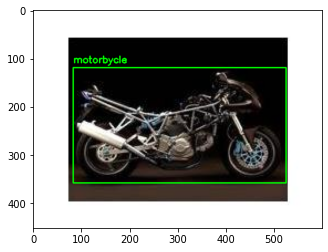

In [25]:
#Show image
import matplotlib.pyplot as plt
plt.imshow(image)
cv2.waitKey(0)